# Monte Carlo Simulation

The purpose of that application is to simulate the commission expenses of the next year of an imaginary company.

**Necessary Imports **

For this algorithm we will use the basics libraries of python known as Pandas, Numpy and Matplotlib.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
mean = 1
std = 0.1
n_employees = 500
n_simulations = 1000

** Data Generation **

Here we create a simple dataset all random, to simulate some real simulation of the sales given the employee.

Each row is an employee and each columns is an information of their sales and comissions

* sales_pct: The sales percentage that an employee reached of the target value give to him/her, it will give us the actual value. (It's simulated in a Normal Distribution)
* sales_expected: It's the expectation of the sales of the employees.
* sales_prob: Is the distribuition of the sales_expected between the employees. (Sums up to 100%)
* sales_target: Here we choose randomly sales_expected given the probabilities for the number of employees.
* sales_actual: Is the actual sale given by the sales_pct * sales_target.
* commission_rate: Rate of commission, given the sales probability.
* commission_amount: Amount of the commision by employee.

In [3]:
sales_pct = np.random.normal(mean, std, n_employees).round(2)
sales_expected = [75000, 100000, 200000, 300000, 400000, 500000]
sales_prob = [0.3, 0.3, 0.2, 0.1, 0.05, 0.05]
sales_target = np.random.choice(sales_expected, n_employees, p=sales_prob)
sales_actual = sales_target * sales_pct

In [4]:
def commision_rate_func(x: float) -> float:
    """
        Given the actual sales porcentage from the expected sale, 
    it return the commission rate.
    
    INPUT
    ------
        x: a float value of the sales porcentage.
        
    RETURN
    ------
        commission rate in float.
    """
    
    return 0.02 if x <= 0.9 else 0.03 if x <= .99 else 0.04

In [5]:
commission_rate = [commision_rate_func(pct) for pct in sales_pct]
commission_amount = commission_rate * sales_actual

In [6]:
df = pd.DataFrame(data={
    'sales_expected': sales_target,
    'sales_percentage': sales_pct,
    'sales_actual': sales_actual,
    'commission_rate': commission_rate,
    'commission_amount': commission_amount
})

** Data exploration **

In [7]:
df.head()

,sales_expected,sales_percentage,sales_actual,commission_rate,commission_amount
0,100000,0.91,91000.0,0.03,2730.0
1,300000,0.96,288000.0,0.03,8640.0
2,500000,1.18,590000.0,0.04,23600.0
3,200000,0.74,148000.0,0.02,2960.0
4,100000,0.94,94000.0,0.03,2820.0


In [8]:
df.describe()

,sales_expected,sales_percentage,sales_actual,commission_rate,commission_amount
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,168700.000000,0.998040,168345.500000,0.033280,5714.970000
std,120402.672758,0.101467,122286.726965,0.007679,4628.601133
min,75000.000000,0.660000,57000.000000,0.020000,1140.000000
25%,75000.000000,0.930000,84000.000000,0.030000,2880.000000
50%,100000.000000,1.000000,106000.000000,0.040000,4080.000000
75%,200000.000000,1.070000,214000.000000,0.040000,8167.500000
max,500000.000000,1.320000,595000.000000,0.040000,23800.000000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 5 columns):
sales_expected       500 non-null int64
sales_percentage     500 non-null float64
sales_actual         500 non-null float64
commission_rate      500 non-null float64
commission_amount    500 non-null float64
dtypes: float64(4), int64(1)
memory usage: 19.7 KB


** Monte Carlo Simulation **

Here is where the magic happen!

Now that we simulated an example of the dataset, we can continue to the Monte Carlo Simulation.

The simulation consist in a loop of 1000 interations (can increment, depending of the project), inside that is the steps to calculate the commission amount. This is need when we want to estimate the future commission expenses, it's an heuristic technic and can approximate some expensive real functions. 

It work like magic!

In [10]:
commission_total = np.zeros(n_simulations)

for i in range(n_simulations):
    sales_target = np.random.choice(sales_expected, n_employees, p=sales_prob)
    sales_pct = np.random.normal(mean, std, n_employees).round(2)
    
    sales_actual = sales_target * sales_pct  
    commission_rate = [commision_rate_func(pct) for pct in sales_pct]
    commission_amount = commission_rate * sales_actual
    
    commission_total[i] = commission_amount.sum()

In [11]:
print("Comission Stats\n")
print(f"Mean: {commission_total.mean():.2f}")
print(f"Min: {commission_total.min():.2f}")
print(f"Max: {commission_total.max():.2f}")

Comission Stats

Mean: 2861046.52
Min: 2545817.50
Max: 3188765.00


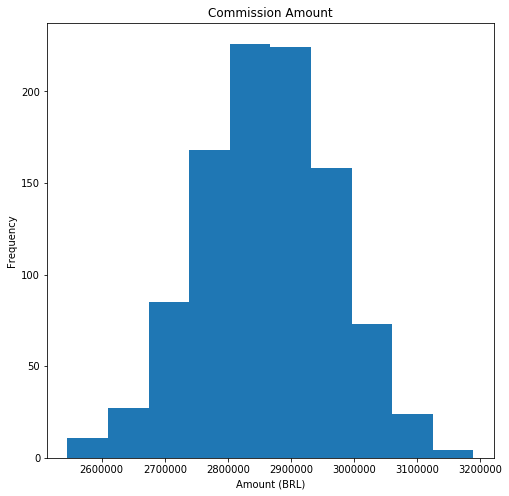

In [12]:
plt.figure(figsize=(8,8))
plt.title('Commission Amount')
plt.ylabel('Frequency')
plt.xlabel('Amount (BRL)')
plt.hist(commission_total, bins=10)
plt.show()

** Conclusion **

At the end we can see that it can help predict some impact in a company, like the next year expenses with commissions.

Here we can see that the mean value of comission expenses is about 2.861.046, for being a normal distribution is know that it's the more likely value in here, other distribuition can change that perception. 

The max value that commission can have is 3.188.765 and the min is about 2.545.817.

So, knowing some stuffs like that, the company can be prepared for the future.